In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

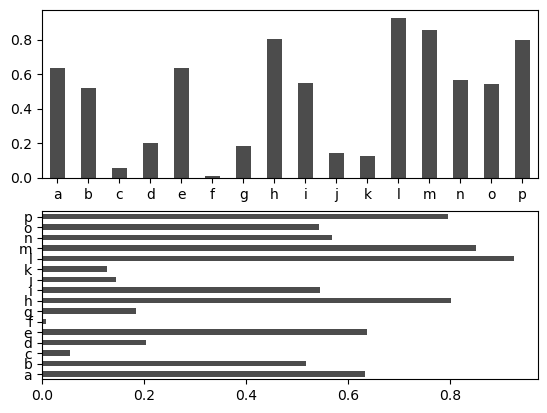

In [2]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))
data.plot.bar(ax=axes[0], color="black", alpha=0.7, rot=0);
data.plot.barh(ax=axes[1], color="black", alpha=0.7);

In [3]:
df = pd.DataFrame(np.random.uniform(size=(6, 4)) * 100,
                  index = ["one", "two", "three", "four", "five", "six"],
                  columns=pd.Series(["A", "B", "C", "D"]))

In [4]:
df

,A,B,C,D
one,10.492640,75.959056,94.182732,55.774000
two,13.761244,93.200066,95.418601,29.715326
three,83.804394,24.137036,77.280985,10.269883
four,42.815157,30.891215,36.262424,99.806308
five,36.087823,73.149217,69.129046,92.768530
six,36.361689,68.162051,99.807554,93.605220


<Axes: >

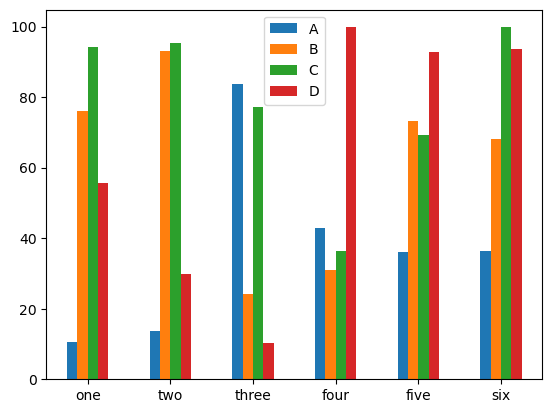

In [5]:
df.plot.bar(rot=0)

<Axes: >

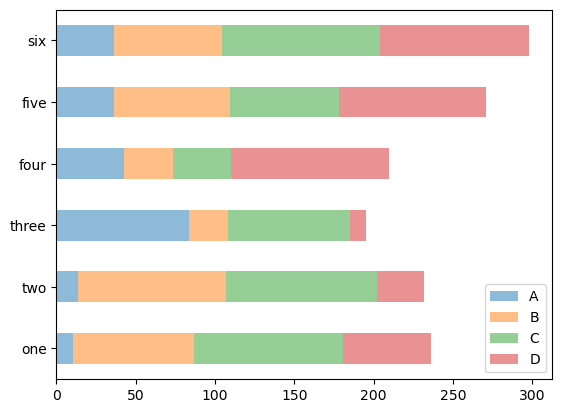

In [6]:
df.plot.barh(stacked=True, alpha=0.5)

In [7]:
tips = pd.read_csv("book_data/tips.csv")

In [8]:
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [9]:
party_counts = pd.crosstab(tips["day"], tips["size"])

In [10]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [11]:
party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])

In [12]:
party_counts


size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [13]:
party_counts = party_counts.loc[:, 2:5]

In [14]:
party_counts

size,2,3,4,5
day,,,,
Thur,48,4,5,1
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3


In [15]:
party_counts = party_counts.div(party_counts.sum(axis="columns"),
                                axis="index")

In [16]:
party_counts

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


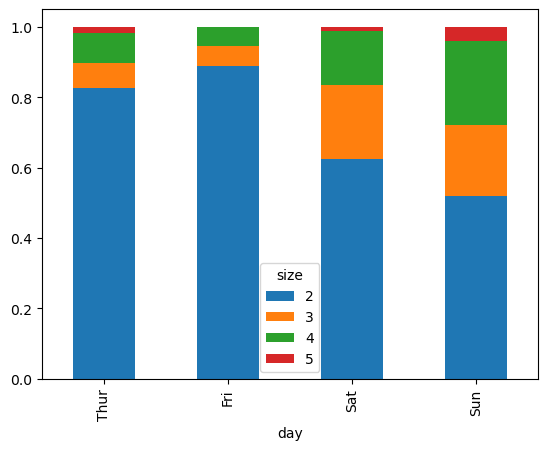

In [18]:
party_counts.plot.bar(stacked=True);

In [19]:
import seaborn as sns

In [20]:
tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])

In [21]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<Axes: xlabel='tip_pct', ylabel='day'>

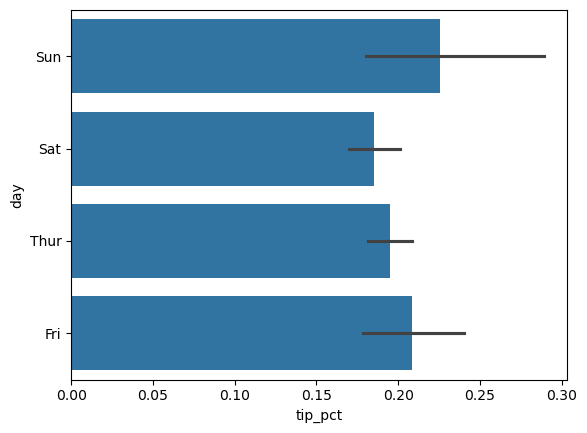

In [22]:
sns.barplot(x="tip_pct", y="day", data=tips, orient="h")

In [28]:
sns.set_style("whitegrid")
sns.set_palette("Greys_r")

<Axes: xlabel='tip_pct', ylabel='day'>

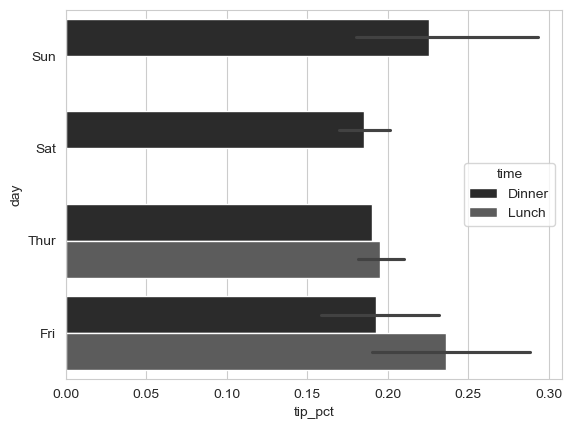

In [29]:
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")


<Axes: ylabel='Frequency'>

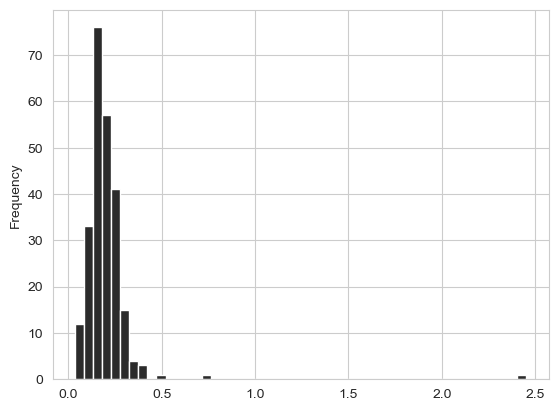

In [30]:
tips["tip_pct"].plot.hist(bins=50)

<Axes: ylabel='Density'>

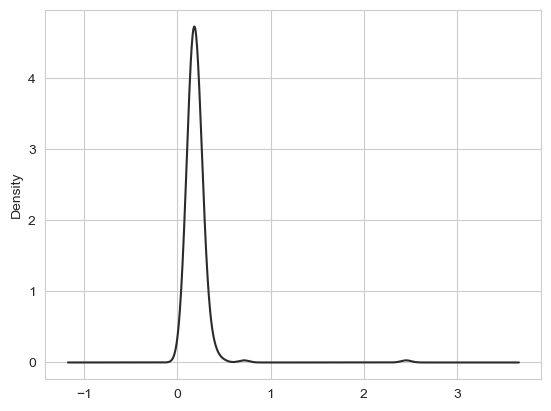

In [31]:
tips["tip_pct"].plot.density()

In [32]:
comp1 = np.random.standard_normal(200)

In [33]:
comp2 = 10 + 2 * np.random.standard_normal(200)

In [34]:
values = pd.Series(np.concatenate([comp1, comp2]))

<Axes: ylabel='Count'>

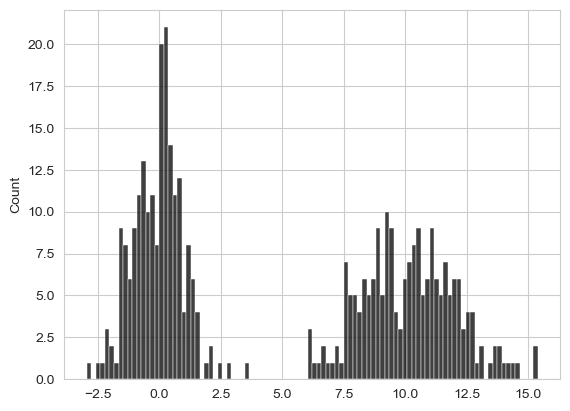

In [35]:
sns.histplot(values, bins=100, color="black")

In [37]:
macro = pd.read_csv("book_data/macrodata.csv")

In [39]:
data = macro[["cpi", "m1", "tbilrate", "unemp"]]

In [40]:
trans_data =  np.log(data).diff().dropna()

In [41]:
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log(m1) versus log(unemp)')

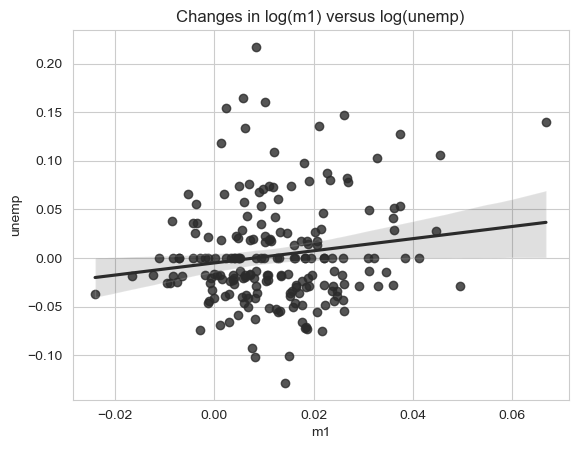

In [51]:
ax = sns.regplot(x="m1", y="unemp", data=trans_data)
ax.set_title("Changes in log(m1) versus log(unemp)")

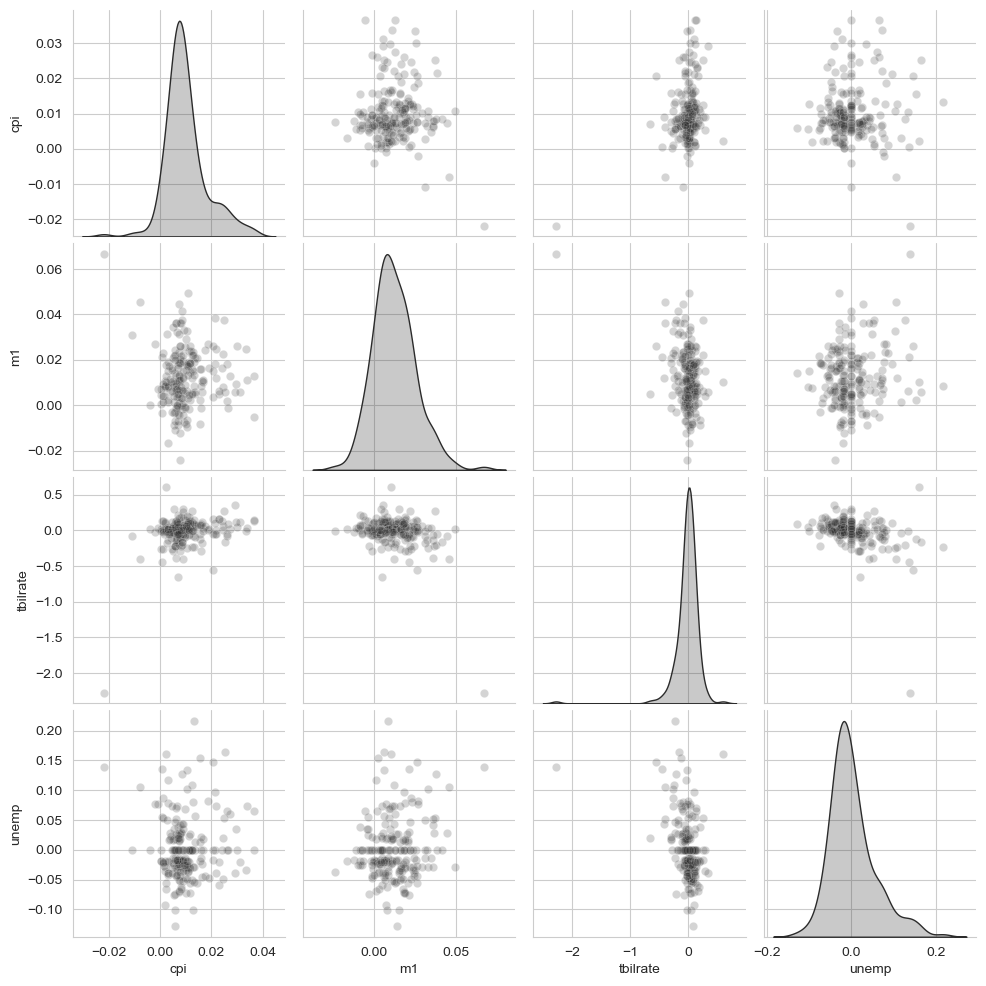

In [52]:
sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha":0.2})